# Предобработка данных для РФА

**1. Загрузка и чтение файла**

In [20]:
#загрузка библиотек

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #для сложных математических функций
import math as mth
from plotly.subplots import make_subplots
from scipy.stats import shapiro 
import scipy.stats as stats 
from scipy.stats import pearsonr 

#для загрузки из внешних ссылок
from urllib.parse import urlencode
import requests

from sklearn import preprocessing 

import warnings
warnings.simplefilter('ignore')

In [2]:
#путь к папке с табличным файлом
path = 'D:\\WORK\\'

In [3]:
#прочитаем данные из файла
try:
    data = pd.read_excel('D:\\WORK\\test_data.xlsx', index_col=0)
except:
    data = pd.read_excel(path + 'test_data.xlsx') 

In [4]:
#познакомимся с данными
display(data.head())

,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,F,S
1,60.0,1.00,16.9,6.34,0.140000,2.0800,4.830000,4.640000,1.89000,0.5300,100.000000,50.000000
2,61.0,0.98,16.5,6.32,0.142523,2.0384,4.714286,4.626647,1.92150,0.5194,97.633136,49.842271
3,60.5,0.96,16.2,6.30,0.141355,NaN,4.628571,4.612006,1.90575,0.5088,95.857988,49.684543
4,40.0,0.92,17.0,6.40,0.093458,1.9136,4.857143,4.685212,1.26000,0.4876,100.591716,50.473186
5,82.0,1.05,17.3,6.42,0.191589,2.1840,4.942857,4.699854,2.58300,0.5565,102.366864,50.630915


In [5]:
#размер таблицы, типы данных, пропуски 
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SiO2    10 non-null     float64
 1   TiO2    10 non-null     float64
 2   Al2O3   9 non-null      float64
 3   Fe2O3   10 non-null     float64
 4   MnO     10 non-null     float64
 5   MgO     9 non-null      float64
 6   CaO     10 non-null     float64
 7   Na2O    10 non-null     float64
 8   K2O     10 non-null     float64
 9   P2O5    10 non-null     float64
 10  F       10 non-null     float64
 11  S       10 non-null     float64
dtypes: float64(12)
memory usage: 1.0 KB


None

SiO2     0
TiO2     0
Al2O3    1
Fe2O3    0
MnO      0
MgO      1
CaO      0
Na2O     0
K2O      0
P2O5     0
F        0
S        0
dtype: int64

In [6]:
#доля пропусков в тех столбцах, где они есть
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(
            'Количество пропусков в столбце', col, ':', data[col].isna().sum(),
            'что составляет', (data[col].isna().sum() / data.shape[0])*100,'% от всех данных по этому столбцу')

Количество пропусков в столбце Al2O3 : 1 что составляет 10.0 % от всех данных по этому столбцу
Количество пропусков в столбце MgO : 1 что составляет 10.0 % от всех данных по этому столбцу


**Вывод: данные успешно загружены и пригодны для исследования. Изменение типов данных не требуется.** 

**2. Статистический анализ данных**

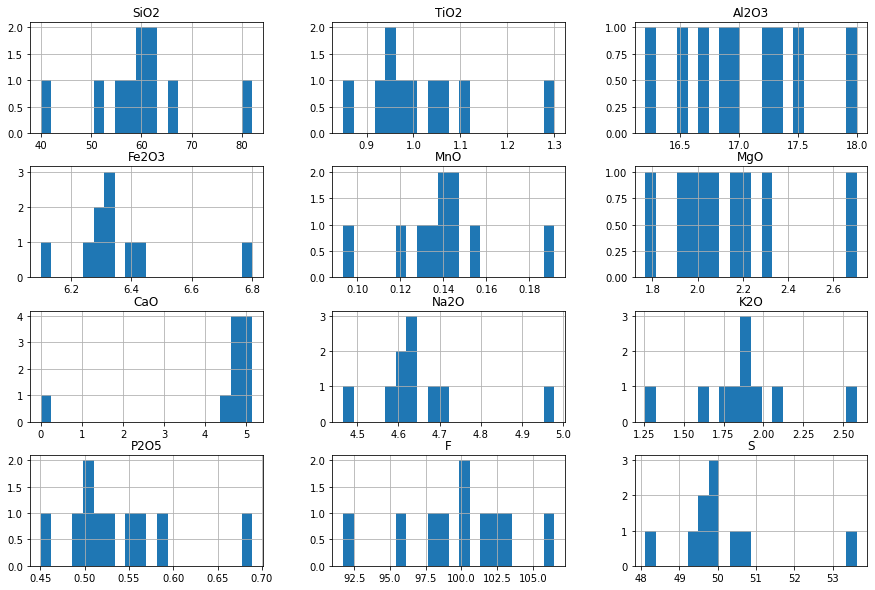

In [7]:
#построим общую гистограму для всех столбцов таблицы
data.hist(figsize=(15,10), bins = 20);

**Вывод о распределении: данные представлены неравномерно, существуют пробелы и значительный разброс в отдельных элементах (CaO, S)**

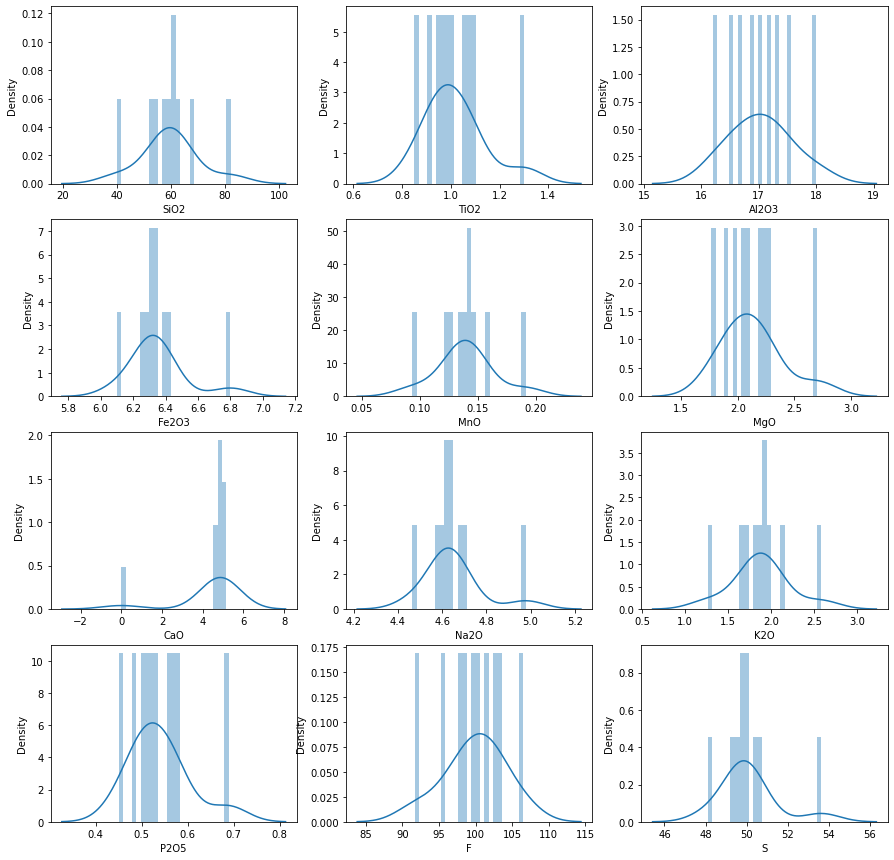

In [8]:
#распределение величин
plt.subplots(figsize = (15, 15))
for i,col in enumerate(data.columns):
    sns.distplot(data[col], bins=25, ax = plt.subplot(4, 3, i + 1))
plt.show(); 

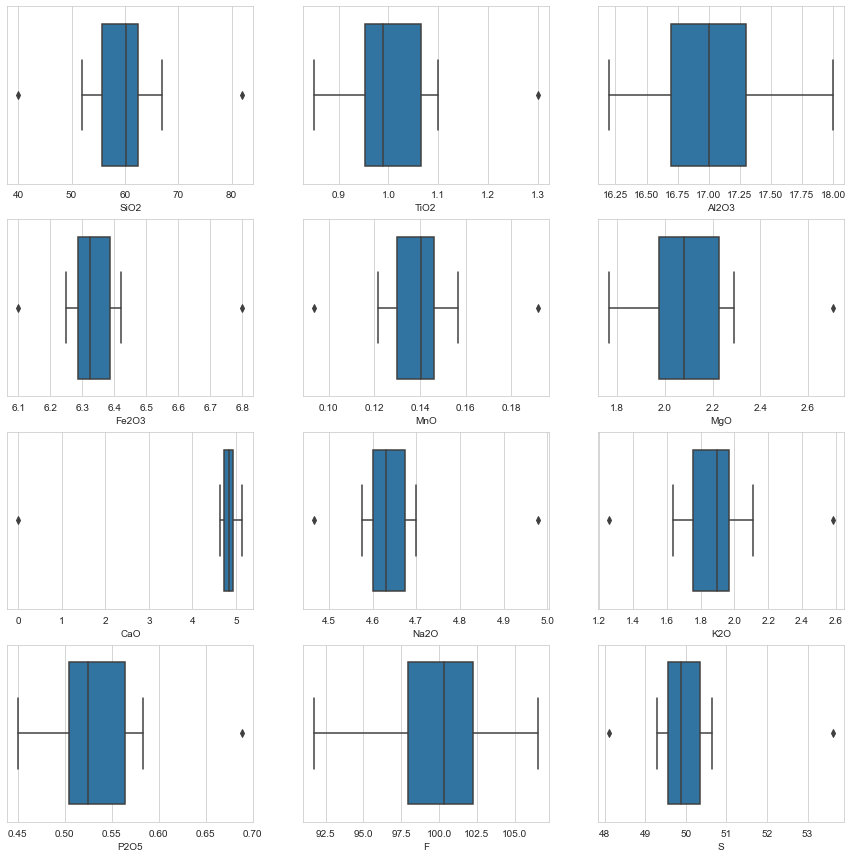

In [9]:
plt.subplots(figsize=(15,15))
sns.set_style('whitegrid')

for i,col in enumerate(data.columns):
    sns.boxplot(data[col], ax = plt.subplot(4, 3, i + 1));

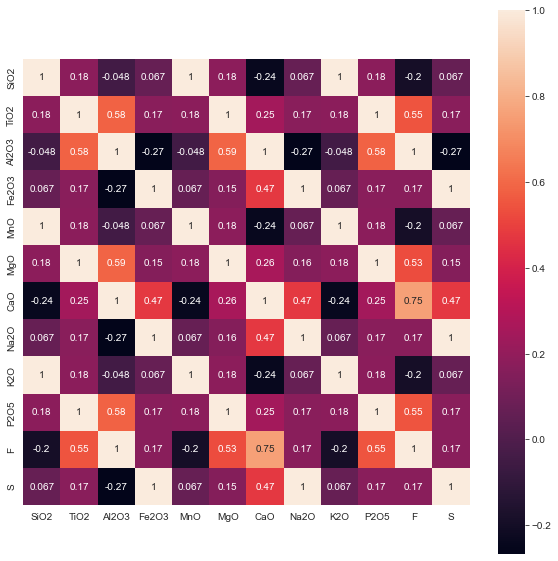

In [10]:
#строим корреляционную матрицу
corr_m = data.corr() 

#нарисуем heatmap
plt.figure(figsize = (10,10))
sns.heatmap(corr_m, square = True, annot = True)
plt.show()

**Вывод о наличии взаимно коррелируемых параметров: в нашем случае несколько пар обладают сильной прямой корреляционной связью. Это всего лишь результат создания тестового набора данных.** 

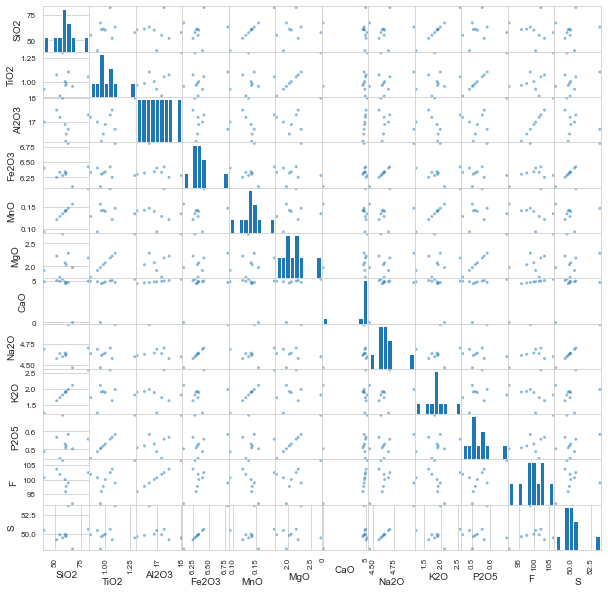

In [11]:
#построим диаграмму рассеяния
pd.plotting.scatter_matrix(data, figsize = (10,10));

По корреляционной матрице можно оценить зависимости параметров друг от друга.

**3. Описательная статистика**

In [12]:
#дисперсия
variance = list(np.var(data))
#стандартное отклонение
st_deviation = list(np.std(data))
#критерий Шапиро-Уилка для оценки "нормальности" распределения
shap = []
for col in data.columns:
    shap.append(shapiro(data[col])[1]) 

In [13]:
#создадим таблицу со статистическими значениями
data_stat = data.describe()

In [14]:
#создадим список для названий индексов (чтобы убрать цифры)
new_index = ['var', 'std', 'p_value_shapiro']
new = list(data_stat.index)
new.extend(new_index)

In [15]:
#сводная таблица со статистическими параметрами
data_stat.loc[len(data_stat.index)] = variance
data_stat.loc[len(data_stat.index)] = st_deviation
data_stat.loc[len(data_stat.index)] = shap

#переименуем индексы
data_stat.index = new

display(data_stat)

,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,F,S
count,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,59.810000,1.018000,17.033333,6.354000,0.139724,2.130844,4.380143,4.651408,1.884015,0.539540,99.881657,50.110410
std,10.737520,0.123630,0.543139,0.179827,0.025087,0.269019,1.545960,0.131657,0.338232,0.065524,4.172891,1.418195
min,40.000000,0.850000,16.200000,6.100000,0.093458,1.768000,0.000000,4.465593,1.260000,0.450500,91.715976,48.107256
25%,55.650000,0.952500,16.700000,6.285000,0.130023,1.976000,4.728571,4.601025,1.752975,0.504825,97.928994,49.566246
50%,60.250000,0.990000,17.000000,6.325000,0.140678,2.080000,4.843571,4.630307,1.897875,0.524700,100.295858,49.881703
75%,62.500000,1.065000,17.300000,6.385000,0.146028,2.225600,4.935714,4.673909,1.968750,0.564450,102.218935,50.354890
max,82.000000,1.300000,18.000000,6.800000,0.191589,2.704000,5.142857,4.978038,2.583000,0.689000,106.508876,53.627760
var,103.764900,0.013756,0.262222,0.029104,0.000566,0.064330,2.150994,0.015600,0.102961,0.003864,15.671720,1.810148
std,10.186506,0.117286,0.512076,0.170599,0.023800,0.253633,1.466627,0.124901,0.320875,0.062162,3.958752,1.345418


**Вывод: по большинству параметров p-значение не меньше 0,05, поэтому мы не можем отвергнуть нулевую гипотезу о нормальом распределении. Однко по параметрам Fe2O3, CaO, Na2O и S p-значение меньше 0,05, поэтому мы отвергаем нулевую гипотезу о нормальности распределения.**

**4. Масштабирование данных**

In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
data_scale = min_max_scaler.fit_transform(data)

#преобразуем массив в датафрейм
array = data_scale
df = pd.DataFrame(array) 
df.columns = data.columns

display(df)

,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,F,S
0,0.476190,0.333333,0.388889,0.342857,0.474286,0.333333,0.939167,0.340343,0.476190,0.333333,0.56,0.342857
1,0.500000,0.288889,0.166667,0.314286,0.500000,0.288889,0.916667,0.314286,0.500000,0.288889,0.40,0.314286
2,0.488095,0.244444,0.000000,0.285714,0.488095,NaN,0.900000,0.285714,0.488095,0.244444,0.28,0.285714
3,0.000000,0.155556,0.444444,0.428571,0.000000,0.155556,0.944444,0.428571,0.000000,0.155556,0.60,0.428571
4,1.000000,0.444444,0.611111,0.457143,1.000000,0.444444,0.961111,0.457143,1.000000,0.444444,0.72,0.457143
5,0.419048,1.000000,1.000000,0.257143,0.419048,1.000000,1.000000,0.257143,0.419048,1.000000,1.00,0.257143
6,0.285714,0.488889,0.722222,0.214286,0.285714,0.488889,0.972222,0.214286,0.285714,0.488889,0.80,0.214286
7,0.642857,0.222222,NaN,0.000000,0.642857,0.222222,0.000000,0.000000,0.642857,0.222222,0.00,0.000000
8,0.547619,0.555556,0.277778,1.000000,0.547619,0.555556,0.927778,1.000000,0.547619,0.555556,0.48,1.000000
9,0.357143,0.000000,0.555556,0.328571,0.357143,0.000000,0.955556,0.328571,0.357143,0.000000,0.68,0.328571


In [35]:
#оценим величины параметров после масштабирования
display(df.describe())

,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,F,S
count,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.471667,0.373333,0.462963,0.362857,0.471476,0.387654,0.851694,0.362606,0.471667,0.373333,0.552000,0.362857
std,0.255655,0.274734,0.301744,0.256896,0.255652,0.287413,0.300603,0.256919,0.255655,0.274734,0.282087,0.256896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372619,0.227778,0.277778,0.264286,0.372619,0.222222,0.919444,0.264286,0.372619,0.227778,0.420000,0.264286
50%,0.482143,0.311111,0.444444,0.321429,0.481190,0.333333,0.941806,0.321429,0.482143,0.311111,0.580000,0.321429
75%,0.535714,0.477778,0.611111,0.407143,0.535714,0.488889,0.959722,0.406514,0.535714,0.477778,0.710000,0.407143
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
